In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from subprocess import check_output
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df= pd.read_csv("C:\\Users\\MAYANK\\Downloads\\Zomato eda.csv",encoding='latin-1')

In [3]:
df.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.shape

(9551, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿Restaurant ID      9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe()

,ï»¿Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# In data analysis what all things we do
1.Missing values
2.Explore about the numerical variables
3.Explore about the categorical variables
4.Finding Relationship between features


In [8]:
df.isnull().sum()

ï»¿Restaurant ID        0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

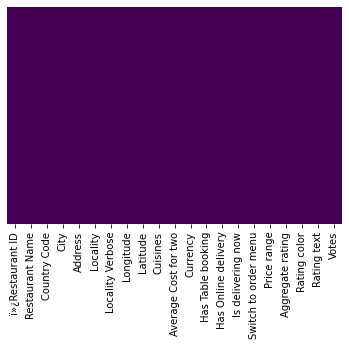

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df_country=pd.read_csv("C:\\Users\\MAYANK\\Downloads\\Country-Codes.csv")

In [12]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [13]:
df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [14]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')

In [15]:
final_df.head(2)

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [16]:
## to check data types
final_df.dtypes

ï»¿Restaurant ID          int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [17]:
final_df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [18]:
country_names= final_df.Country.value_counts().index

In [19]:
country_values=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x290a30c0790>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

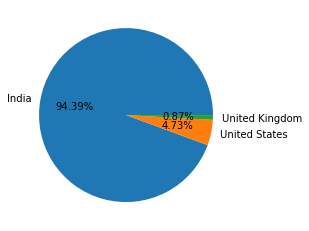

In [20]:
##Pie chart- Top 3 countries that uses zomato
plt.pie(country_values[:3],labels=country_names[:3],autopct="%1.2f%%")


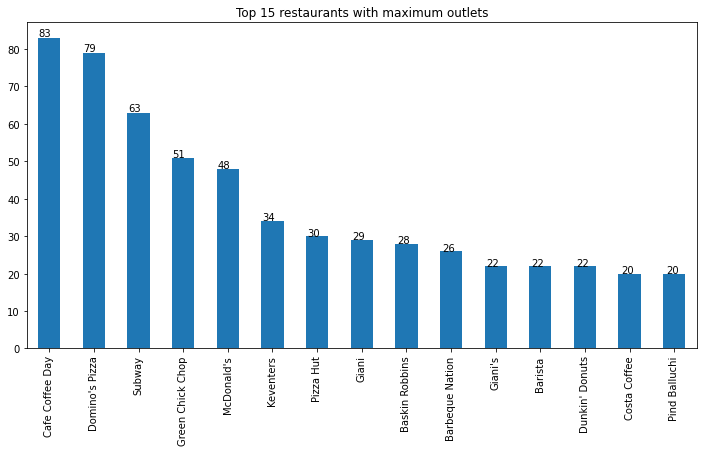

In [21]:
#Top 15 restaurants with maximum no. of outlets
ax=final_df['Restaurant Name'].value_counts().head(15).plot.bar(figsize=(12,6))
ax.set_title("Top 15 restaurants with maximum outlets")
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x()*1.005, i.get_height()*1.005))

we can see CCD,Dominos and Subway are the clear winner here.But what aboout tehe other restaurants apart from 15!!
A better way to visualize the no. of outlets for more resturants can be with wordcloud.

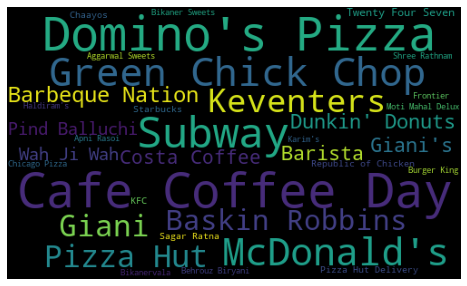

In [22]:
stopwords = set(STOPWORDS)
wordcloud = (WordCloud(width= 500, height=300,relative_scaling=0.5,
                       stopwords=stopwords).generate_from_frequencies
            (final_df['Restaurant Name'].value_counts().head(35)))
fig= plt.figure(1,figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
#No. of countries & no. of restro listed in dataset
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [24]:
final_df.loc[final_df['Country']=='India'].City.value_counts().head(10)

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Name: City, dtype: int64

# Lets find out top10 restaurants in the data with highest no. if votes


<AxesSubplot:xlabel='Restaurant Name'>

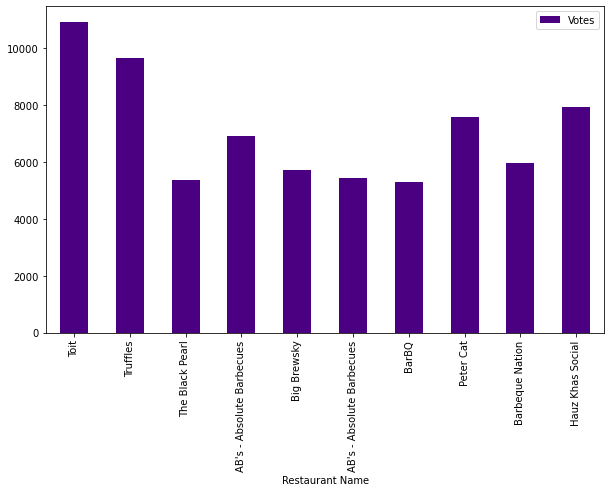

In [25]:
max_votes = final_df.Votes.sort_values(ascending=False).head(10)
final_df.loc[final_df['Votes'].isin(max_votes)][['Restaurant Name','Votes']]
final_df.loc[final_df['Votes'].isin(max_votes)][['Restaurant Name','Votes']].plot.bar(x='Restaurant Name',y='Votes',
                                                                                     figsize=(10,6),color='indigo')

In [26]:
final_df_india= final_df.loc[final_df['Country']=='India']
final_df_india.head(3)

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India


<AxesSubplot:title={'center':'Cost vs Agg Rating'}, xlabel='Average Cost for two', ylabel='Aggregate rating'>

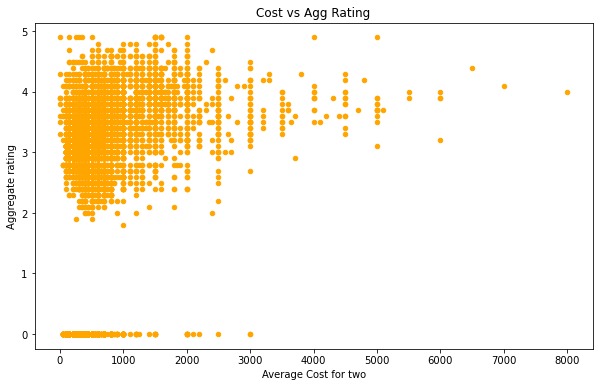

In [27]:
#if there is any relation between average cost of two and aggregate rating of restaurants
final_df_india.plot.scatter(x='Average Cost for two',y='Aggregate rating',figsize=(10,6),color='orange',title="Cost vs Agg Rating")

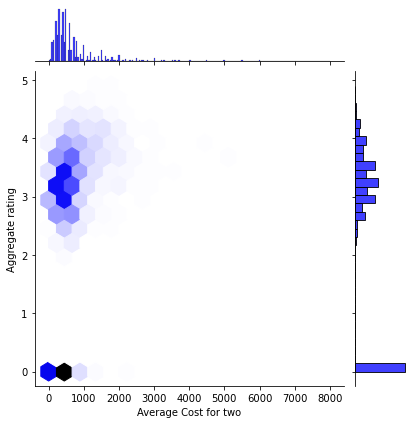

In [28]:
#Better view of relation between avaerage cost of two and aggregate rating of customers
sns.jointplot(x='Average Cost for two',y='Aggregate rating',kind='hex',gridsize=18,data=final_df_india,color='blue')

In [29]:
final_df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [30]:
final_df.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [31]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})


# Observation
1.When Rating is between 4.5 to 4.9 ---->Excellent
2.When rating is between 4.0 to 4.4 ---->Very Good
3.When rating is between 3.5 to 3.9 ----> Good
4.When Rating is between 2.5 to 3.4 ---->Average 
5.When Rating is between 1.8 to 2.4 ---->Poor


In [32]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

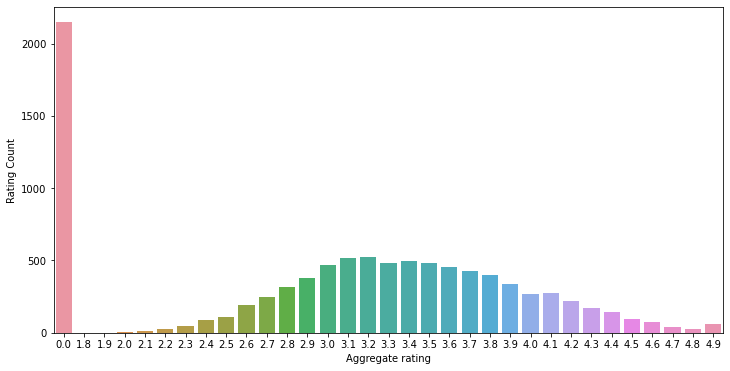

In [33]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x="Aggregate rating", y= "Rating Count",data =ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

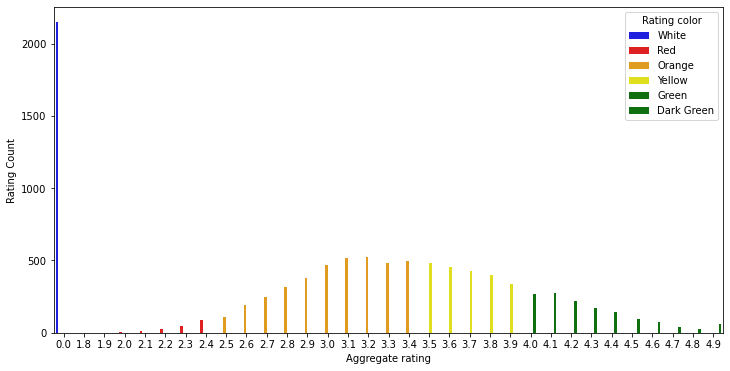

In [34]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

# observations:
    1. Not rated is very high.
    2.Maximum no. of rating are between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

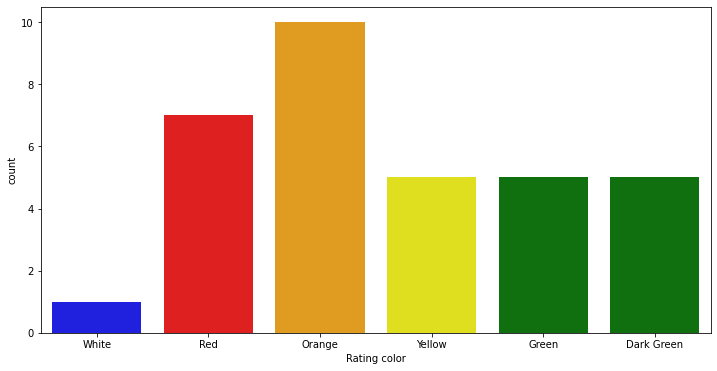

In [35]:
##Count plot
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [36]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [37]:
##Find the countries name that has given  0 rating
final_df[final_df['Rating color']== 'White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [38]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


# obervatins:
    Maximum no. of 0 rating are from indian customers

In [39]:
##find out which currency is used by which country
final_df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [40]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [41]:
## Which country do have online deliveries option
final_df[final_df['Has Online delivery']=="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [42]:
final_df[['Has Online delivery','Country']].groupby(["Has Online delivery",'Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


# Observations:
    Also, In   india some of the regions has not delivery options available
    and online deliveries are avilable in india and UAE.

In [43]:
## create a pie chart for cities distribution
city_values= final_df.City.value_counts().values
city_labels= final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x290a5307a60>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

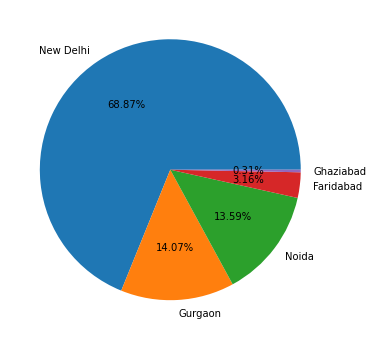

In [44]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')

In [45]:
## find the to 10 cuisines
final_df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [46]:
final_df[['Cuisines']]

,Cuisines
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"
...,...
9546,Turkish
9547,"World Cuisine, Patisserie, Cafe"
9548,"Italian, World Cuisine"
9549,Restaurant Cafe


In [47]:
cuisines_values= final_df.Cuisines.value_counts().values
cuisines_labels= final_df.Cuisines.value_counts().index

([<matplotlib.patches.Wedge at 0x290a511db80>,
 [Text(0.4175823090707363, 1.0176566292965188, 'North Indian'),
  Text(-1.090169487983684, 0.14673270756512372, 'North Indian, Chinese'),
  Text(-0.6326704341218391, -0.8998489438722946, 'Chinese'),
  Text(0.3048764124205039, -1.0569060379946758, 'Fast Food'),
  Text(1.0036916287969155, -0.45011455684413826, 'North Indian, Mughlai')],
 [Text(0.22777216858403795, 0.5550854341617375, '37.61%'),
  Text(-0.5946379025365549, 0.0800360223082493, '20.53%'),
  Text(-0.3450929640664576, -0.4908266966576152, '14.22%'),
  Text(0.16629622495663846, -0.5764942025425503, '14.22%'),
  Text(0.5474681611619538, -0.24551703100589356, '13.42%')])

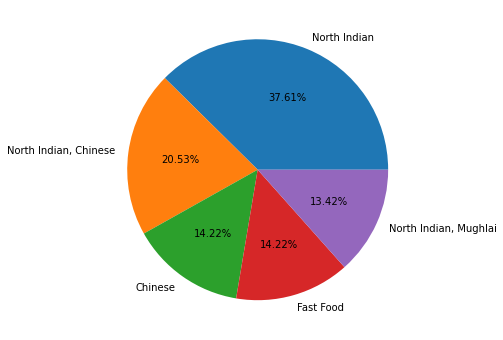

In [48]:
plt.pie(cuisines_values[:5],labels=cuisines_labels[:5],autopct='%1.2f%%')

# observations:
    The top 5 cuisines are North indian, North indian,mughlai,Fast Food,Chinese,North indian ,chinese

C:\Users\MAYANK\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


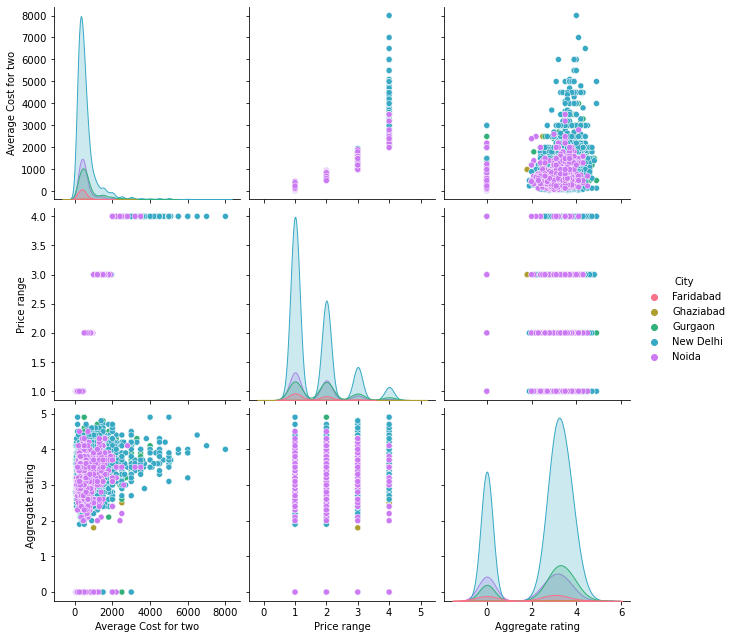

In [49]:
#More insights for correlation by using plot keeping top 5 cities with max restro
top5_indian_cities= ['New Delhi','Gurgaon','Noida','Faridabad','Ghaziabad']
zomato_p= final_df.loc[final_df['City'].isin(top5_indian_cities)]
zomato_pair= zomato_p[['Average Cost for two','Price range','Aggregate rating','City']]
sns.pairplot(zomato_pair,size=3,hue='City',palette='husl')

Next lets try to find out similar relation by keeping our data limited to top 5 cuisines instead of cities

C:\Users\MAYANK\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


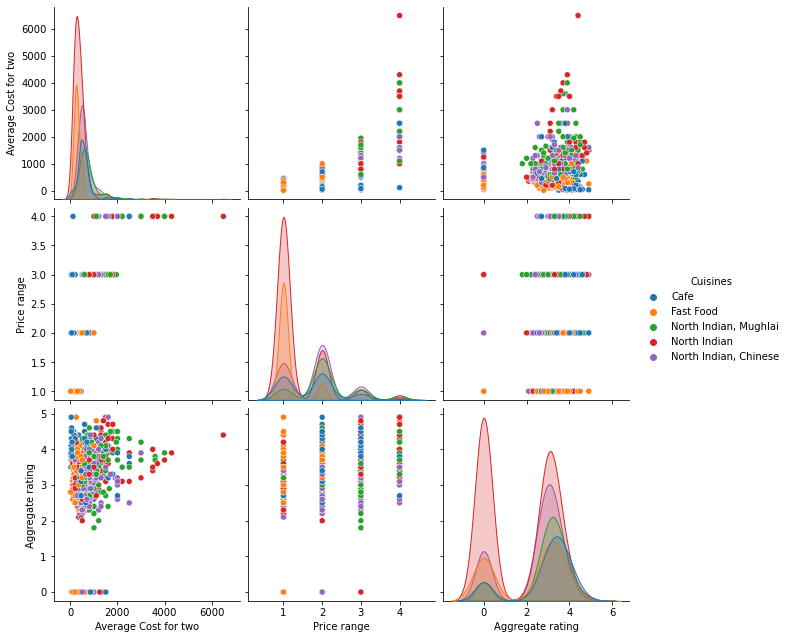

In [50]:
#Correlation of cost, price range and rating  with top 5 cusines
top5cuisines_list= ['North Indian','North Indian, Chinese','Fast Food','North Indian, Mughlai','Cafe']

zomato_cuisines= final_df.loc[final_df['Cuisines'].isin(top5cuisines_list)]

zomato_cuisines_data=zomato_cuisines[['Average Cost for two','Price range','Aggregate rating','Cuisines']]

sns.pairplot(zomato_cuisines_data,size=3,hue='Cuisines')

Now lets analyze top 10 cuisines with 'price range' and 'agg rating' and look at our findings

Text(0.5, 1.0, 'Analysis of Top 10 Cuisines with price range and Agg.rating')

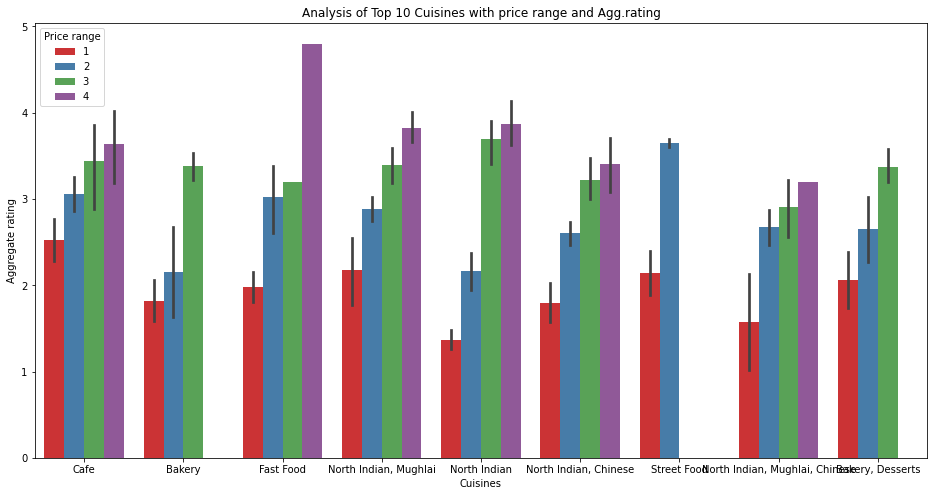

In [51]:
##Analyse of top 10  cuisines with price range and agg rating
top10cuisines_list=['North Indian','North Indian, Chinese','Fast Food','North Indian, Mughlai','Cafe','Bakery',
                   'North Indian, Mughlai, Chinese','Bakery, Desserts','Street Food']

zomato_cuisines= final_df.loc[final_df['Cuisines'].isin(top10cuisines_list)]

zomato_cuisines_data= zomato_cuisines[['Average Cost for two','Price range','Aggregate rating','Cuisines']]

fig,axx= plt.subplots(figsize=(16,8))
sns.barplot(x='Cuisines',y='Aggregate rating',hue='Price range',data= zomato_cuisines_data,palette='Set1')
axx.set_title("Analysis of Top 10 Cuisines with price range and Agg.rating")

Now lets see what is the most common 'Agg Rating' for each type of cuisine among the 
top 10 cuisines

<AxesSubplot:xlabel='Cuisines', ylabel='Aggregate rating'>

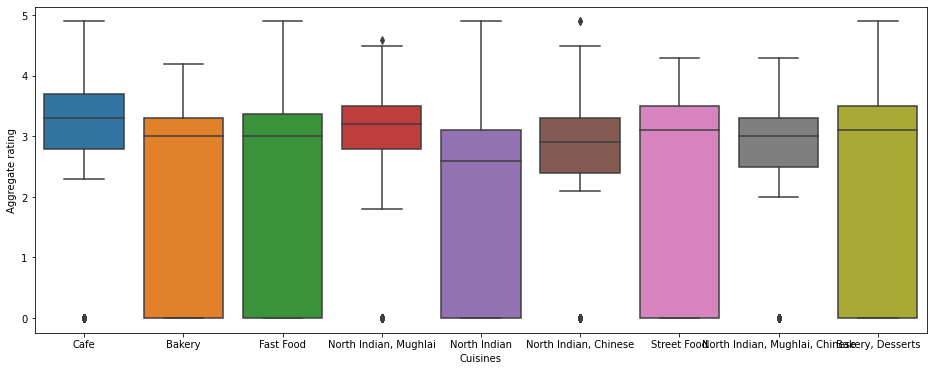

In [52]:
##Most common agg.rating for each type of cuisine
op10cuisines_list=['North Indian', 'North Indian, Chinese', 'Fast Food', 'North Indian, Mughlai', 'Cafe', 'Bakery',
                   'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food' ]
zomato_cuisines = final_df.loc[final_df['Cuisines'].isin(top10cuisines_list)]
zomato_cuisines_data = zomato_cuisines[['Average Cost for two', 'Price range', 'Aggregate rating', 'Cuisines']]
fig, axx =plt.subplots(figsize=(16,6))
sns.boxplot(x='Cuisines',y='Aggregate rating', data=zomato_cuisines_data)

In [58]:
final_df.columns

Index(['ï»¿Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [59]:
#Restaurant percentage wise rating in top 5 cities

top5_indian_cities= ['New Delhi','Gurgaon','Noida','Faridabad','Ghaziabad']
zomato_rate= final_df.loc[final_df['City'].isin(top5_indian_cities)]

#Find total number of restaurants
total_restro = zomato_rate.groupby(['City'],as_index=False).count()[['City','ï»¿Restaurant ID']]
total_restro.columns=['City','Total Restaurants']

#Find total rating count of each type
top5rest= final_df.groupby(['City','Rating text'],as_index=False)[['Restaurant Name']].count()
top5rest.columns= ['City','Rating text','Total Ratings']

#Merge both the dataframes and calculate percentage

top5restro_rating_percent= pd.merge(total_restro,top5rest,on='City')

top5restro_rating_percent['Percentage']=(top5restro_rating_percent['Total Ratings']/top5restro_rating_percent['Total Restaurants'])*100
top5restro_rating_percent

,City,Total Restaurants,Rating text,Total Ratings,Percentage
0,Faridabad,251,Average,123,49.003984
1,Faridabad,251,Excellent,1,0.398406
2,Faridabad,251,Good,22,8.764940
3,Faridabad,251,Not rated,100,39.840637
4,Faridabad,251,Poor,2,0.796813
5,Faridabad,251,Very Good,3,1.195219
6,Ghaziabad,25,Average,18,72.000000
7,Ghaziabad,25,Good,4,16.000000
8,Ghaziabad,25,Not rated,2,8.000000
9,Ghaziabad,25,Poor,1,4.000000


# Now lets plot the above data in the from of a graph and list our findings


<AxesSubplot:title={'center':'Percentage Rating of Restaurants in Top 5 Cities'}, xlabel='City', ylabel='Percentage'>

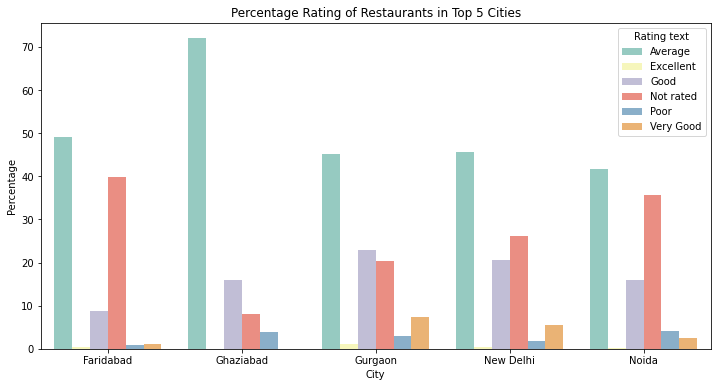

In [67]:
#plot Rating percentage of restaurants in top 5 cities
fig, axx= plt.subplots(figsize=(12,6))
axx.set_title("Percentage Rating of Restaurants in Top 5 Cities")
sns.barplot(x='City',y='Percentage',hue='Rating text',data= top5restro_rating_percent,palette='Set3')

In [ ]:
####From the above graph, we can see that maximum number of resturants in top 5
cities have the rating 'Average'.

####Excellent rating is almost negligible.
####There are significant number of restaurants which are not rated as well.
So 